<a href="https://colab.research.google.com/github/GWANGHYUNYU/pytorch-tutorial/blob/master/09_1_mnist_softmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import torch
import torch.nn as nn
import torchvision.datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

In [25]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [26]:
# parameters
training_epochs = 15
batch_size = 100
learning_rate = 0.001

In [27]:
# MNIST dataset
mnist_train = torchvision.datasets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = torchvision.datasets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

In [28]:
# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [34]:
# MNIST data image of shape 28 * 28 = 784
class MNIST_Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(784, 10, bias=True).to(device)

    def forward(self, x):
        x = self.linear1(x)
        return x

In [52]:
# Initialization
def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.normal_(linear.weight)

In [54]:
net = MNIST_Classifier()

In [61]:
count = 1
for para in net.parameters():
    print(count, "'th layer ", para.size())
    print(para)
    count += 1

1 'th layer  torch.Size([10, 784])
Parameter containing:
tensor([[-0.0126, -0.0108,  0.0192,  ..., -0.0202,  0.0116,  0.0023],
        [ 0.0236, -0.0265, -0.0022,  ..., -0.0116, -0.0242, -0.0086],
        [-0.0117, -0.0229,  0.0271,  ..., -0.0288, -0.0227, -0.0229],
        ...,
        [-0.0013,  0.0028, -0.0226,  ...,  0.0331,  0.0037, -0.0327],
        [ 0.0322, -0.0093, -0.0009,  ..., -0.0144, -0.0043,  0.0283],
        [-0.0200,  0.0134, -0.0019,  ..., -0.0229,  0.0081, -0.0333]],
       requires_grad=True)
2 'th layer  torch.Size([10])
Parameter containing:
tensor([ 0.0027, -0.0155,  0.0239, -0.0052,  0.0252, -0.0149, -0.0339, -0.0151,
         0.0311, -0.0115], requires_grad=True)


In [62]:
net2 = MNIST_Classifier()
net2.apply(init_weights)

MNIST_Classifier(
  (linear1): Linear(in_features=784, out_features=10, bias=True)
)

In [63]:
count = 1
for para in net2.parameters():
    print(count, "'th layer ", para.size())
    print(para)
    count += 1

1 'th layer  torch.Size([10, 784])
Parameter containing:
tensor([[ 0.0316, -0.0102, -0.0135,  ...,  0.0246, -0.0275,  0.0076],
        [ 0.0174,  0.0349,  0.0288,  ...,  0.0078,  0.0041,  0.0349],
        [ 0.0203,  0.0101,  0.0184,  ...,  0.0067,  0.0057, -0.0196],
        ...,
        [-0.0353, -0.0286,  0.0180,  ...,  0.0158,  0.0013, -0.0055],
        [ 0.0247,  0.0348,  0.0157,  ..., -0.0083, -0.0155, -0.0130],
        [-0.0329, -0.0271,  0.0289,  ..., -0.0206,  0.0287,  0.0161]],
       requires_grad=True)
2 'th layer  torch.Size([10])
Parameter containing:
tensor([-0.0109,  0.0345, -0.0181, -0.0039, -0.0317, -0.0239, -0.0274, -0.0074,
         0.0100, -0.0307], requires_grad=True)


In [64]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)    # Softmax is internally computed.
optimizer = torch.optim.Adam(linear.parameters(), lr=learning_rate)

In [65]:
total_batch = len(data_loader)
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 5.121769428
Epoch: 0002 cost = 1.531380534
Epoch: 0003 cost = 1.033073068
Epoch: 0004 cost = 0.831098557
Epoch: 0005 cost = 0.715820551
Epoch: 0006 cost = 0.639230490
Epoch: 0007 cost = 0.583988726
Epoch: 0008 cost = 0.540780365
Epoch: 0009 cost = 0.508075655
Epoch: 0010 cost = 0.480787814
Epoch: 0011 cost = 0.458990157
Epoch: 0012 cost = 0.439993888
Epoch: 0013 cost = 0.424095601
Epoch: 0014 cost = 0.410545319
Epoch: 0015 cost = 0.398283571
Learning finished


Accuracy: 0.8662999868392944
Label:  8
Prediction:  3


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:69: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:59: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


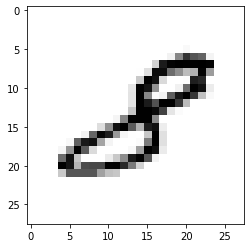

In [66]:
# Test the model using test sets
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    
    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()